# Preâmbulo

Imports, funções, downloads e instalação do Pytorch.

In [0]:
# Reinstalling torch with the right CUDA bindings.
!pip3 install -U https://download.pytorch.org/whl/cu100/torch-1.1.0-cp36-cp36m-linux_x86_64.whl
!pip3 install -U https://download.pytorch.org/whl/cu100/torchvision-0.3.0-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 770.7MB 29kB/s 
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


     |████████████████████████████████| 2.6MB 1.7MB/s 
  Found existing installation: torchvision 0.3.0
    Uninstalling torchvision-0.3.0:
      Successfully uninstalled torchvision-0.3.0


In [0]:
# Basic imports.
import os
import time
import numpy as np
import torch

from torch import nn
from torch import optim

from torch.utils.data import DataLoader
from torch.utils import data
from torch.backends import cudnn

from torchvision import models
from torchvision import datasets
from torchvision import transforms

from skimage import io

from sklearn import metrics

from matplotlib import pyplot as plt

%matplotlib inline

cudnn.benchmark = True

# Sintaxe básica do Pytorch

Assim como o NumPy e o MXNet, o Pytorch é uma biblioteca de processamento vetorial/matricial/tensorial. Operações sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com operações sobre tensores do NumPy e MXNet.

## Casting para o dispositivo correto

Como usaremos processamento vetorial principalmente em GPUs para aprendizado profundo, primeiramente é possível verificar se há uma GPU disponível com o trecho de código abaixo, armazenando os tensores nos dispositivos apropriados.

In [0]:
# Checking if GPU/CUDA is available.
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


## Tensores no Pytorch

Criando tensores novos.

In [0]:
tns = torch.tensor([1, 2, 3, 4, 5, 6])
print(tns)

tensor([1, 2, 3, 4, 5, 6])


Reorganizando tensores.

In [0]:
print(tns.view(2, 3))

# Function view() with -1 infers the shape according to the remaining elements.
print(tns.view(3, -1))

tensor([[0.4107, 0.0713, 0.1623],
        [0.6770, 0.8527, 0.7865]])
tensor([[0.4107, 0.0713],
        [0.1623, 0.6770],
        [0.8527, 0.7865]])


Iniciando tensores vazios

In [0]:
tns_0 = torch.zeros(2, 3)
tns_1 = torch.ones(2, 3)

print(tns_0)
print(tns_1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Iniciando tensores com valores aleatórios.

In [0]:
tns_u = torch.rand(2, 3) # Flat distribution.
print(tns_u)

tns_n = torch.randn(2, 3) # Normal Distribution.
print(tns_n)

tns_perm = torch.randperm(6) # Random permutation of the interval [0, 5].
print(tns_perm)

tensor([[0.6267, 0.4909, 0.9100],
        [0.3794, 0.2422, 0.1829]])
tensor([[-1.2571,  0.9560, -0.8660],
        [ 0.3818, -0.8611, -0.2930]])
tensor([3, 2, 1, 4, 0, 5])


Operações com tensores.

In [0]:
print(tns_u)
print(tns_n)

tns_sum = tns_u + tns_n
print(tns_sum)

tensor([[0.6267, 0.4909, 0.9100],
        [0.3794, 0.2422, 0.1829]])
tensor([[-1.2571,  0.9560, -0.8660],
        [ 0.3818, -0.8611, -0.2930]])
tensor([[-0.6304,  1.4469,  0.0440],
        [ 0.7612, -0.6189, -0.1101]])


Indexação.

In [0]:
print(tns_sum[1, 1]) # Indexing element.
print(tns_sum[0, :]) # Indexing line.
print(tns_sum[:, 1]) # Indexing column.

tensor(-0.2247)
tensor([-0.0041,  1.0504, -1.4629])
tensor([ 1.0504, -0.2247])


Convertendo de tensores do numpy.

In [0]:
np_arr = np.random.randn(2, 3)
print(np_arr, np_arr.dtype)

torch_tns = torch.from_numpy(np_arr)
print(torch_tns)

[[ 0.79914842  0.65067953 -0.52020761]
 [-1.20479623  0.41412455  0.88032694]] float64
tensor([[ 0.7991,  0.6507, -0.5202],
        [-1.2048,  0.4141,  0.8803]], dtype=torch.float64)


Concatenando tensores.

In [0]:
print(tns_u)
print(tns_n)

tns_cat = torch.cat((tns_u, tns_n), 0)
print(tns_cat)

tensor([[ 0.6267,  0.4909,  0.9100],
        [ 0.3794,  0.2422,  0.1829],
        [-1.2571,  0.9560, -0.8660],
        [ 0.3818, -0.8611, -0.2930]])


Várias outras operações sobre tensores do Pytorch podem ser vistas nos seguintes tutoriais:
1.   https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/
2.   https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Treinando uma MLP simples em dados aleatórios

In [0]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

print(x)
print(y)

tensor([[ 1.0697, -0.8655,  0.7422,  ..., -2.1555,  0.5242, -0.8380],
        [ 0.3323, -0.4930,  2.7336,  ...,  1.0246,  0.3956, -0.5767],
        [ 0.4844, -1.7043, -1.6217,  ...,  0.6703, -1.4023, -1.0271],
        ...,
        [ 0.6272,  1.1326,  1.6196,  ..., -1.2598, -0.9911, -0.3733],
        [-0.8201, -0.4616, -1.4029,  ...,  1.6377, -0.3022, -1.7810],
        [-0.4634, -1.0167, -0.3594,  ..., -0.4808,  1.4103, -0.5878]])
tensor([[-6.3763e-01, -5.4006e-01, -1.3607e-01,  6.2997e-01,  2.8408e-01,
          8.1948e-01, -2.0191e+00,  5.7331e-01, -7.9399e-01, -2.2821e-01],
        [ 3.2706e-01, -8.3610e-02,  1.1553e-01,  5.5504e-01,  8.3848e-01,
          8.5405e-02, -1.0547e+00,  6.8876e-01,  4.7744e-02, -8.8231e-01],
        [-9.0068e-01, -9.6210e-01,  3.3908e-01,  8.5861e-01, -4.4938e-01,
          5.4125e-02,  5.8993e-01,  1.8550e+00, -1.8036e-01, -1.3145e+00],
        [ 4.7366e-01,  1.3621e+00,  1.6578e+00, -9.8601e-01, -2.4221e-02,
         -2.6964e-01,  3.1591e-01, -2.7109e+0

In [0]:
# Casting tensors to the appropriate device.
x = x.to(device)
y = y.to(device)

print(x)
print(y)

tensor([[ 1.0697, -0.8655,  0.7422,  ..., -2.1555,  0.5242, -0.8380],
        [ 0.3323, -0.4930,  2.7336,  ...,  1.0246,  0.3956, -0.5767],
        [ 0.4844, -1.7043, -1.6217,  ...,  0.6703, -1.4023, -1.0271],
        ...,
        [ 0.6272,  1.1326,  1.6196,  ..., -1.2598, -0.9911, -0.3733],
        [-0.8201, -0.4616, -1.4029,  ...,  1.6377, -0.3022, -1.7810],
        [-0.4634, -1.0167, -0.3594,  ..., -0.4808,  1.4103, -0.5878]],
       device='cuda:0')
tensor([[-6.3763e-01, -5.4006e-01, -1.3607e-01,  6.2997e-01,  2.8408e-01,
          8.1948e-01, -2.0191e+00,  5.7331e-01, -7.9399e-01, -2.2821e-01],
        [ 3.2706e-01, -8.3610e-02,  1.1553e-01,  5.5504e-01,  8.3848e-01,
          8.5405e-02, -1.0547e+00,  6.8876e-01,  4.7744e-02, -8.8231e-01],
        [-9.0068e-01, -9.6210e-01,  3.3908e-01,  8.5861e-01, -4.4938e-01,
          5.4125e-02,  5.8993e-01,  1.8550e+00, -1.8036e-01, -1.3145e+00],
        [ 4.7366e-01,  1.3621e+00,  1.6578e+00, -9.8601e-01, -2.4221e-02,
         -2.6964e-01,

In [0]:
# Printing sizes of tensors.
print(x.size())
print(y.size())

torch.Size([64, 1000])
torch.Size([64, 10])


## Definindo arquitetura, loss e otimizador

In [0]:
# Use the nn package to define our model.
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
).to(device)

In [0]:
print(model)

Sequential(
  (0): Linear(in_features=1000, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)


In [0]:
# Use the nn package to define our loss function.
loss_fn = nn.MSELoss(reduction='sum').to(device)

In [0]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## Minimizando o erro entre $f(x)$ e $y$

In [0]:
# Creating list of losses for each epoch.
loss_list = []

# Iterating over epochs.
for epoch in range(500):
    
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    
    if (epoch + 1) % 10 == 0:
        print('Epoch ' + str(epoch + 1) + ': loss = ' + str(loss.item()))
    
    # Updating list of losses for printing.
    loss_list.append(loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

Epoch 10: loss = 370.6188049316406
Epoch 20: loss = 207.9576873779297
Epoch 30: loss = 112.93785858154297
Epoch 40: loss = 59.65734100341797
Epoch 50: loss = 31.452808380126953
Epoch 60: loss = 16.884960174560547
Epoch 70: loss = 9.29613208770752
Epoch 80: loss = 5.238800048828125
Epoch 90: loss = 3.015277862548828
Epoch 100: loss = 1.7727394104003906
Epoch 110: loss = 1.0639944076538086
Epoch 120: loss = 0.6521657705307007
Epoch 130: loss = 0.4077293276786804
Epoch 140: loss = 0.259786456823349
Epoch 150: loss = 0.1682613641023636
Epoch 160: loss = 0.110488660633564
Epoch 170: loss = 0.07349345088005066
Epoch 180: loss = 0.04938848316669464
Epoch 190: loss = 0.03349599242210388
Epoch 200: loss = 0.022927353158593178
Epoch 210: loss = 0.015819432213902473
Epoch 220: loss = 0.010989188216626644
Epoch 230: loss = 0.0076801045797765255
Epoch 240: loss = 0.005396471358835697
Epoch 250: loss = 0.003809090470895171
Epoch 260: loss = 0.0026997076347470284
Epoch 270: loss = 0.00192054372746497

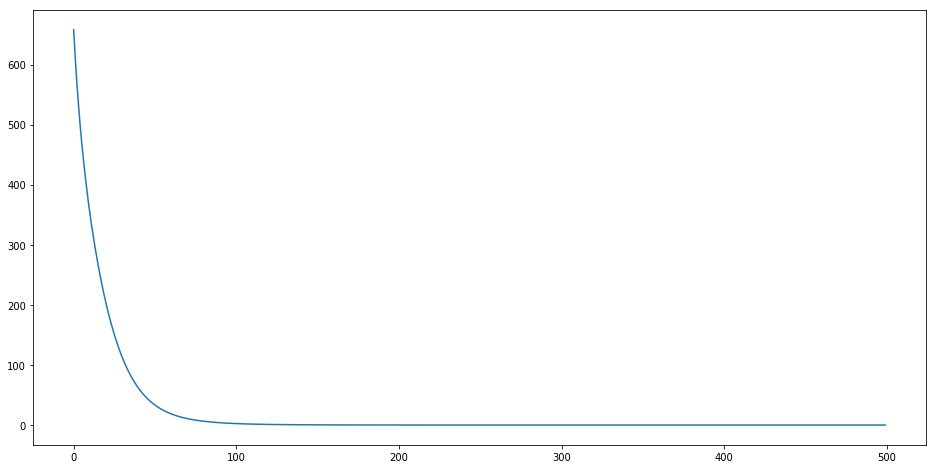

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(np.asarray(loss_list))

plt.show()